<a href="https://colab.research.google.com/github/WhiteHum/Medical-AI-Deep-Learning-Drug-Toxicitiy-Prediction-/blob/main/Deep_learning_Classification_code_Pattern_(Drug_Toxicity_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **필요한 라이브러리 및 데이터 준비**

### **라이브러리 설치하기**

In [1]:
# 필요한 라이브러리 설치하기

!pip install PyTDC
!pip install lifelines
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 1.6 MB/s 
     |████████████████████████████████| 29.3 MB 1.7 MB/s 
  Created wheel for PyTDC: filename=PyTDC-0.3.8-py3-none-any.whl size=136139 sha256=2895c8837e060e54816404ec16766bdd63f69174e3dd493731cd9c5fe1368090
  Stored in directory: /root/.cache/pip/wheels/4a/4f/da/b494dde823e311675b3ce778ca8c22e734ef8f779dbf311805
Successfully built PyTDC
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 5.0 MB/s 
     |████████████████████████████████| 77 kB 3.4 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=bc74c4ce0038d074c4842346602ff3c11c90611b045a4959d1be87337b4d0680
  Stored in directory: /root/.cache/pip/wheels/16/a2/b6/582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built au

### **데이터 준비**

In [2]:
from tdc.single_pred import Tox

# TDC api를 이용하여 LD50 데이터 불러오기
data = Tox(name = 'LD50_Zhu')

# 불러온 데이터 train-valid-test로 나누기
split = data.get_split()

Downloading...
100%|██████████| 707k/707k [00:00<00:00, 8.39MiB/s]
Loading...
Done!


In [3]:
# 나누어진 데이터 확인
split.keys()

dict_keys(['train', 'valid', 'test'])

In [4]:
# Train data
split['train']

,Drug_ID,Drug,Y
0,"Methane, tribromo-",BrC(Br)Br,2.343
1,Bromoethene (9CI),C=CBr,2.330
2,"1,1'-Biphenyl, hexabromo-",Brc1ccc(-c2ccc(Br)c(Br)c2Br)c(Br)c1Br,1.465
3,"Isothiocyanic acid, p-bromophenyl ester",S=C=Nc1ccc(Br)cc1,2.729
4,"Benzene, bromo-",Brc1ccccc1,1.765
...,...,...,...
5165,"Benzenesulfonic acid, 3,5-dimethyl-4-hydroxy-",Cc1cc(S(=O)(=O)O)cc(C)c1O,1.883
5166,"Isocyanic acid, (alpha,alpha,alpha-trifluoro-o...",O=C=Nc1ccccc1C(F)(F)F,1.427
5167,"Propanenitrile, 3-((2-(acetyloxy)ethyl)phenyla...",CC(=O)OCCN(CCC#N)c1ccccc1,2.050
5168,"IH-Indene-1,3(2H)-dione, 2-(2-methyl-1-(2-(1-p...",CC1=CC(=C2C(=O)c3ccccc3C2=O)C=CN1CCN1CCCCC1,2.951


In [5]:
# Valid data
split['valid']

,Drug_ID,Drug,Y
0,"Heptanoic acid, 7-iodo-",O=C(O)CCCCCCI,2.058
1,"2(1H)-Quinazolinone, 4-(3-hydroxyphenyl)-7-met...",Cc1ccc2c(-c3cccc(O)c3)nc(=O)n(C(C)C)c2c1,2.266
2,"Heptanoic acid, 2-(4-(3-(2-(trifluoromethyl)-1...",CCCCCCC(=O)OCCN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F...,3.378
3,"1-Butanol, 2-ethyl-",CCC(CC)CO,1.742
4,"2,8,9-Trioxa-5-aza-1-silabicyclo(3.3.3)undecan...",Clc1cccc([Si]23OCCN(CCO2)CCO3)c1,4.255
...,...,...,...
733,"(1)-alpha,alpha,4-Trimethylcyclohex-3-ene-1-me...",CC1=CCC(C(C)(C)O)CC1,1.475
734,5-(Aminomethyl)isoxazol-3-ol hydrate,NCc1cc(=O)[nH]o1,3.404
735,"Acetaldehyde, diethyl acetal",CCOC(C)OCC,1.410
736,"3H-1,4-Benzodiazepin-2-amine, 7-chloro-N-(cycl...",[O-][N+]1=C(c2ccccc2)c2cc(Cl)ccc2N=C(NCC2CC2)C1,1.888


In [6]:
# Test data
split['test']

,Drug_ID,Drug,Y
0,"Ether, alpha-(bromomethyl)-p-cyclopentylbenzyl...",CCCCOC(CBr)c1ccc(C2CCCC2)cc1,3.114
1,"Benzene, 1,4-dinitroso-",O=Nc1ccc(N=O)cc1,2.125
2,"Succinic acid, mercapto-, diethyl ester, S-est...",CCOC(=O)CC(SP(=O)(OC)SC)C(=O)OCC,3.466
3,"Phosphorodithioic acid, O,S,S-triethyl ester",CCOP(=O)(SCC)SCC,3.185
4,"Phenol, 2-octyl- (9CI)",CCCCCCCCc1ccccc1O,1.867
...,...,...,...
1472,"1H-1,2,4-Triazole, 1-((2-(2,4-dichlorophenyl)-...",CCCC1COC(Cn2cncn2)(c2ccc(Cl)cc2Cl)O1,2.353
1473,"Phosphorothioic acid, O-(3-chloro-4-nitropheny...",CCOP(=S)(OCC)Oc1ccc([N+](=O)[O-])c(Cl)c1,3.814
1474,"Dibenz(b,f)oxepin-2-acetic acid, 10,11-dihydro...",Cc1ccc2c(c1)CC(=O)c1cc(CC(=O)O)ccc1O2,2.937
1475,"Phosphorothioic acid, O,O-dimethyl S-(2-(ethyl...",CCS(=O)(=O)CCSP(=O)(OC)OC,3.908


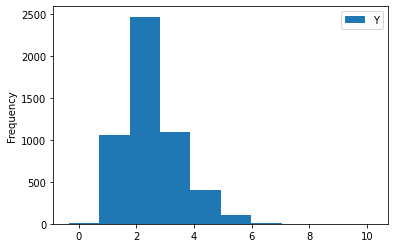

In [7]:
# 각각의 데이터에 이상치가 있는지 확인하기
split['train'].plot.hist()

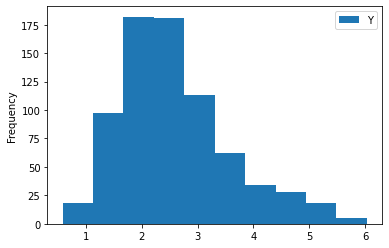

In [8]:
split['valid'].plot.hist()

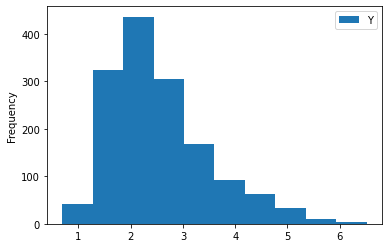

In [10]:
split['test'].plot.hist()

### **데이터 전처리 (Data pre-processing)**

In [11]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np

# s (str) : SMILES of a drug
# radius (int) : ECFP radius
# nBits (int) : size of binary representation
# Return () : morgan fingerprint


def smiles2morgan(s, radius=2, nBits = 1024):
  try : 
    mol = Chem.MolFromSmiles(s)
    features_vec = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits = nBits)
    features = np.zeros((1, ))
    DataStructs.ConvertToNumpyArray(features_vec, features)
  except:
    print('rdkit not found this smiles for morgan: ' + s +' convert to all 0 features')
  return features

In [13]:
# 전처리 함수 적용하기

for mode in ['train', 'valid', 'test'] :
  split[mode]['embedding'] = split[mode]['Drug'].apply(smiles2morgan)
  split[mode]['Y_binary'] = split[mode]['Y'].apply(lambda x: int(x<2))

In [14]:
# morgan fingerprint로 변환된 데이터 확인
split['test']['embedding']

0       [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
1472    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1473    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1474    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1475    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1476    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: embedding, Length: 1477, dtype: object

In [15]:
split['test']['Y_binary']

0       0
1       0
2       0
3       0
4       1
       ..
1472    0
1473    0
1474    0
1475    0
1476    0
Name: Y_binary, Length: 1477, dtype: int64

## **Torch dataset & DataLoader 만들기**

In [16]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils import data

In [19]:
# 전처리한 데이터를 학습에 사용하기 위한 추상 클래스
# torch.utils.data.Dataset을 상속

class data_process_loader(data.Dataset):
  def __init__(self, df):
    #생성자, 앞서 전처리한 데이터 attribute에 저장
    self.df = df
  
  def __len__ (self):
    # 전체 샘플 개수 출력을 위한 method
    return self.df.shape[0]
  
  def __getitem__(self, index):
    # 인덱스로 데이터에 접근하기 위한 method
    v_d = self.df.iloc[index]['embedding'] # input
    y = self.df.iloc[index]['Y_binary'] # label
    return v_d, y


In [23]:
train_dataset = data_process_loader(split['train'])
valid_dataset = data_process_loader(split['valid'])
test_dataset = data_process_loader(split['test'])


In [21]:
# DataLoader을 위한 hyperparameter 설정

params = {'batch_size' : 64,
          'shuffle': True,
          'num_workers': 1,
          'drop_last': False}

In [24]:
train_loader = data.DataLoader(train_dataset, **params)
valid_loader = data.DataLoader(valid_dataset, **params)
test_loader = data.DataLoader(test_dataset, **params)

len(train_loader)

81

In [25]:
# DataLoader로 쌓인 데이터 확인해 보기
for v_d, y in train_loader:
  print(v_d)
  print(v_d.shape)
  print()
  print(y)
  print(y.shape)
  break

tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
torch.Size([64, 1024])

tensor([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])
torch.Size([64])


In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'현재 device는 {device} 입니다.')

현재 device는 cpu 입니다.


## **모델 만들기**

**Feature extractor**

In [27]:
class MLP(nn.Sequential):

  # input_dim (int) : 입력층 차원
  # output_dim (int) : 출력층 차원
  # hidden_dims_lst (list) : hidden 차원의 차원
  def __init__(self, input_dim, output_dim, hidden_dims_lst):
    super(MLP, self).__init__()

    # Feature extractor layer size
    layer_size = len(hidden_dims_lst) + 1

    # dropout
    self.dropout = nn.Dropout(0.3)

    # 각 층의 차원 크기를 담은 리스트
    dims = [input_dim] + hidden_dims_lst + [output_dim]

    # 입력층, hidden 층, 출력층 차원대로 linear layer 쌓기
    self.predictor = nn.ModuleList([nn.Linear(dims[i], dims[i+1]) for i in range(layer_size)])

  def forward(self, v):
    # 입력 데이터 v로 forward pass
    v = v.float().to(device)
    for i, I in enumerate(self.predictor):
      v = F.relu(self.dropout(I(v)))
    return v

### **Classifier**

In [28]:
class Classifier(nn.Sequential):
  
  # model_drug : 앞서 생성한 Feature extractor 
  # hidden_dim_drug (int) : Classifier 입력층 차원
  # cls_hidden_dims (list) : Classifier hidden 차원
  
  def __init__(self, model_drug, hidden_dim_drug, cls_hidden_dims):
    super(Classifier, self).__init__()

    # feature extractor
    self.model_drug = model_drug

    # dropout
    self.dropout = nn.Dropout(0.3)

    # classifier 입력 차원
    self.input_dim_drug = hidden_dim_drug

    # classifier hidden 차원
    self.hidden_dims = cls_hidden_dims

    #classifier layer size
    layer_size = len(self.hidden_dims) + 1

    # 각 층의 차원 크기를 담은 리스트
    dims = [self.input_dim_drug] + self.hidden_dims + [2]

    # 입력층, hidden 층, 출력층 차원대로 linear layer 쌓기
    self.predictor = nn.ModuleList([nn.Linear(dims[i], dims[i+1]) for i in range(layer_size)])

  def forward(self, v_D) :
    # feature extractor 로 입력 데이터 encoding
    v_f = self.model_drug(v_D)

    # forward-pass with classify
    for i, I in enumerate(self.predictor):
      if i == (len(self.predictor)-1):
        v_f = I(v_f)
      else:
        v_f = F.relu(self.dropout(I(v_f)))
    return v_f


In [31]:
# 모델 hyperparameter

input_dim_drug = 1024
hidden_dim_drug = 256
cls_hidden_dims = [512]
mlp_hidden_dims_drug = [1024]

In [33]:
# 모델 선언하기
model_drug = MLP(1024, hidden_dim_drug, mlp_hidden_dims_drug)
model_drug

MLP(
  (dropout): Dropout(p=0.3, inplace=False)
  (predictor): ModuleList(
    (0): Linear(in_features=1024, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=256, bias=True)
  )
)

In [34]:
model = Classifier(model_drug, hidden_dim_drug, cls_hidden_dims)
model

Classifier(
  (model_drug): MLP(
    (dropout): Dropout(p=0.3, inplace=False)
    (predictor): ModuleList(
      (0): Linear(in_features=1024, out_features=1024, bias=True)
      (1): Linear(in_features=1024, out_features=256, bias=True)
    )
  )
  (dropout): Dropout(p=0.3, inplace=False)
  (predictor): ModuleList(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=2, bias=True)
  )
)

## **모델 학습 진행 (model training)**

In [35]:
# 학습 진행에 필요한 hyperparameter

learning_rate = 0.0001
decay = 0.00001
train_epoch = 50

In [36]:
# optimizer

opt = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = decay)
loss_fn = torch.nn.CrossEntropyLoss()

In [42]:
# 라이브러리 호출

import copy
from prettytable import PrettyTable
from time import time
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

In [47]:
loss_history_train = []
loss_history_val = []
min_acc = 0

# 모델 GPI 메모리에 올리기
model = model.to(device)

# Best 모델 초기화
model_best = copy.deepcopy(model)

# 결과 정리를 위한 PrettyTable
valid_metric_record = []
valid_metric_header = ['# epoch']
valid_metric_header.extend(['Accuracy', 'sensitivity', 'specificity', 'roc_score'])
table = PrettyTable(valid_metric_header)

float2str = lambda x: '%0.4f'%x # float 소수점 4 자리까지만 str로 바꾸기

# 학습 진행
print('--- Go for Training --- ')
# 학습 시작 시간 기록
t_start = time()

for epo in range(train_epoch):
  # Model training
  model.train()

  # Mini-batch 학습
  for i, (v_d, label) in enumerate(train_loader):
    # input data gpu에 올리기
    v_d = v_d.float().to(device)
    # forward-pass
    output = model(v_d)
    

    # 미리 정의한 손실함수(MSE)로 손실(loss) 계산
    loss = loss_fn(output, label.to(device))

    # 각 iteration 마다 loss 기록
    loss_history_train.append(loss.item())

    # gradient 초기화
    opt.zero_grad()
    # back propagation
    loss.backward()
    # parameter update
    opt.step()

  # gradient tracking X
  with torch.set_grad_enabled(False):
    y_pred = []
    y_score = []
    y_label = []

    # model validation
    model.eval()

    for i, (v_d, label) in enumerate(valid_loader):
        # input data gpu에 올리기
        v_d = v_d.float().to(device)
        # forward-pass
        output = model(v_d)

        # 미리 정의한 손실함수 (MSE)로 손실(loss) 계산
        loss = loss_fn(output, label.to(device))
      
        # 각 iteration 마다 loss 기록
        loss_history_val.append(loss.item())
        pred = output.argmax(dim=1, keepdim = True)
        score = nn.Softmax(dim = 1)(output)[:, 1]

        # 예측값, 참값, cpu로 옮기고 numpy 형으로 변환
        pred = pred.cpu().numpy()
        score = score.cpu(). numpy()
        label = label.cpu().numpy()

        # 예측값, 참값 기록하기
        y_label = y_label + label.flatten().tolist()
        y_pred = y_pred + pred.flatten().tolist()
        y_score = y_score + score.flatten().tolist()

  # metric 계산
  classification_metrics = classification_report(y_label, y_pred, target_names = ['NonToxic', 'Toxic'], output_dict = True)

  # sensitivity is the recall of the positive class
  sensitivity = classification_metrics['Toxic']['recall']
  # specificity is the recall of the negative class
  specificity = classification_metrics['NonToxic']['recall']
  # accuracy
  accuracy = classification_metrics['accuracy']
  # confusion matrix
  conf_matrix = confusion_matrix(y_label, y_pred)
  # roc score
  roc_score = roc_auc_score(y_label, y_score)

  # 계산한 metric 합치기
  lst = ['epoch ' + str(epo)] + list(map(float2str, [accuracy, sensitivity, specificity, roc_score]))

  # 각 epoch 마다 결과값 pretty table에 기록
  table.add_row(lst)
  valid_metric_record.append(lst)

  # mse 기준으로 best model 업데이트
  if accuracy > min_acc:
      # best model deepcopy
      model_best = copy.deepcopy(model)
      # max MSE 업데이트
      min_acc = accuracy

  # 각 epoch 마다 결과 출력
  print('Validation at Epoch '+ str(epo +1) + ' , Accuracy: ' + str(accuracy)[:7]+
        ' , sensitivity : '+ str(sensitivity)[:7] + ', specificity: ' +  str(f'{specificity}')+ ', roc_score: ' + str(roc_score)[:7])



--- Go for Training --- 
Validation at Epoch 1 , Accuracy: 0.80487 , sensitivity : 0.59817, specificity: 0.8921001926782274, roc_score: 0.83343
Validation at Epoch 2 , Accuracy: 0.80487 , sensitivity : 0.59817, specificity: 0.8921001926782274, roc_score: 0.83343
Validation at Epoch 3 , Accuracy: 0.80487 , sensitivity : 0.59817, specificity: 0.8921001926782274, roc_score: 0.83343
Validation at Epoch 4 , Accuracy: 0.80487 , sensitivity : 0.59817, specificity: 0.8921001926782274, roc_score: 0.83343
Validation at Epoch 5 , Accuracy: 0.80487 , sensitivity : 0.59817, specificity: 0.8921001926782274, roc_score: 0.83343
Validation at Epoch 6 , Accuracy: 0.80487 , sensitivity : 0.59817, specificity: 0.8921001926782274, roc_score: 0.83343
Validation at Epoch 7 , Accuracy: 0.80487 , sensitivity : 0.59817, specificity: 0.8921001926782274, roc_score: 0.83343
Validation at Epoch 8 , Accuracy: 0.80487 , sensitivity : 0.59817, specificity: 0.8921001926782274, roc_score: 0.83343
Validation at Epoch 9 ,

## **모델 테스트 진행 (model testing)**

In [51]:
# 테스트 진행

model = model_best

y_pred = []
y_label = []
y_score = []

model.eval()

for i, (v_d, label) in enumerate(valid_loader):
    # input data gpu에 올리기
    v_d = v_d.float().to(device)

    with torch.set_grad_enabled(False):
        # forward-pass
        output = model(v_d)

        # 미리 정의한 손실함수(MSE)로 손실(loss) 계산
        loss = loss_fn(output, label.to(device))

        # 각 iteration 마다 loss 기록
        loss_history_val.append(loss.item())
        pred = output.argmax(dim=1, keepdim=True)
        score = nn.Softmax(dim = 1)(output)[:, 1]

        # 예측값, 참값 cpu로 옮기고 numpy 형으로 변환
        pred = pred.cpu().numpy()
        score = score.cpu().numpy()
        label = label.cpu().numpy()

    # 예측값, 참값 기록하기
    y_label = y_label + label.flatten().tolist()
    y_pred = y_pred + pred.flatten().tolist()
    y_score = y_score + score.flatten().tolist()

# metric 계산
classification_metrics = classification_report(y_label, y_pred, target_names = ['NonToxic', 'Toxic'], output_dict = True)

# sensitivity is the recall of the positive class
sensitivity = classification_metrics['Toxic']['recall']
# specificity is the recall of the negative class
specificity = classification_metrics['NonToxic']['recall']
# accuracy
accuracy = classification_metrics['accuracy']
# confusion matrix
conf_matrix = confusion_matrix(y_label, y_pred)
# roc score
roc_score = roc_auc_score(y_label, y_score)


# 각 epoch 마다 결과 출력
print('Validation at Epoch '+ str(epo +1) + ' , Accuracy: ' + str(accuracy)[:7]+
      ' , sensitivity : '+ str(sensitivity)[:7] + ', specificity: ' +  str(f'{specificity}')+ ', roc_score: ' + str(roc_score)[:7])

Validation at Epoch 50 , Accuracy: 0.80487 , sensitivity : 0.59817, specificity: 0.8921001926782274, roc_score: 0.83343


In [52]:
import matplotlib.pyplot as plt

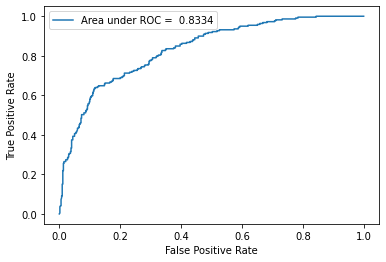

In [53]:
# plot the roc curve
fpr, tpr, _ = roc_curve(y_label, y_score)
plt.plot(fpr, tpr, label = 'Area under ROC = {: .4f}'.format(roc_score))
plt.legend(loc = 'best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

[Text(0, 0.5, 'Toxic'), Text(0, 1.5, 'NonToxic')]

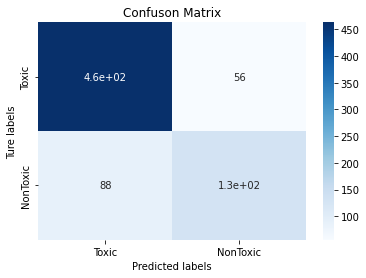

In [54]:
import seaborn as sns

conf_matrix = conf_matrix
ax = plt.subplot()
sns.heatmap(conf_matrix, annot= True, ax = ax, cmap = 'Blues') # annot = True to annotate cells

#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Ture labels')
ax.set_title('Confuson Matrix')
ax.xaxis.set_ticklabels(['Toxic', 'NonToxic'])
ax.yaxis.set_ticklabels(['Toxic', 'NonToxic'])